<a href="https://colab.research.google.com/github/Janeth172/EDP1/blob/main/METODO_EXPLICITO_(ec_onda).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ECUACIÓN DE ONDA**

***MÉTODO EXPLÍCITO***

Aproxime la solución del problema hiperbólico
$$
\frac{\partial^2 u}{\partial t^2}(x,t) - 4\frac{\partial^2 u}{\partial x^2}(x,t) = 0, \quad 0 < x < 1, \quad 0 < t,
$$
con condiciones de frontera
$$
u(0,t) = u(1,t) = 0, \quad \text{para} \quad 0 < t,
$$
y condiciones iniciales
$$
u(x,0) = \text{sen}(\pi x), \quad 0 \leq x \leq 1, \quad \frac{\partial u}{\partial t}(x,0) = 0, \quad 0 \leq x \leq 1.
$$

Usando $h = 0.1$ y $k = 0.05$. Compare los resultados con la solución exacta
$$
u(x,t) = \text{sen}(\pi x) \cos(2\pi t).
$$


In [1]:
import numpy as np
import sympy as sp
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# PARAMETROS DEL PROBLEMA DE LA EDP
alpha = 2.0     # Coeficiente de difusividad
h = 0.1         # Tamaño del paso espacial
k = 0.05        # Tamaño del paso temporal

# Parámetros de Discretización de la Malla
Nx = int(1/h)   # Número total de intervalos espaciales
Nt = 20         # Número total de pasos o iteraciones en el tiempo

In [3]:
# Definición de las Condiciones Iniciales y la Solución Analítica

def u0(x):
    # Condición Inicial de Posición o Desplazamiento (u(x,0))
    return np.sin(np.pi * x)

def ut0(x):
    # Condición Inicial de Velocidad o Tasa de Cambio (du/dt(x,0))
    return np.zeros_like(x)

def u_ex(x, t):
    # Solución Analítica (Exacta) de la Ecuación Diferencial
    return np.sin(np.pi * x) * np.cos(2*np.pi*t)

In [11]:
import numpy as np
import sympy as sp
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from matplotlib.animation import FuncAnimation
from IPython.display import HTML


# Definimos como funcion el metodo explicito
# de la ecuacion de onda, con los parametros

def metodo_explicito_onda(alpha, h, k, Nx, Nt, u0, ut0):
    x = np.linspace(0, 1, Nx+1)
    t = np.linspace(0, Nt*k, Nt+1)

    r = alpha*k/h

    U = np.zeros((Nt+1, Nx+1))

# como para la resolucion de esta ecuacion de onda
# se necesita un diferente tipo de particula
# es necesario definir unos detalles importantes
# para que se puedan calcular todos los puntos interiores
# sin problemas

    # n = 0
    U[0, :] = u0(x)
    U[:, 0]  = 0.0
    U[:, -1] = 0.0

    # n = 1
    for j in range(1, Nx):
        U[1, j] = (
            U[0, j]
            + k*ut0(x[j])
            + 0.5*(r**2)*(U[0, j+1] - 2*U[0, j] + U[0, j-1])
        )

    # n > 1
    for n in range(1, Nt):
        for j in range(1, Nx):
            U[n+1, j] = (
                2*(1 - r**2)*U[n, j]
                + r**2*(U[n, j+1] + U[n, j-1])
                - U[n-1, j]
            )

    return x, t, U

x, t, U = metodo_explicito_onda(alpha, h, k, Nx, Nt, u0, ut0)


**EJERCICIO 1. GRÁFICA 2D**

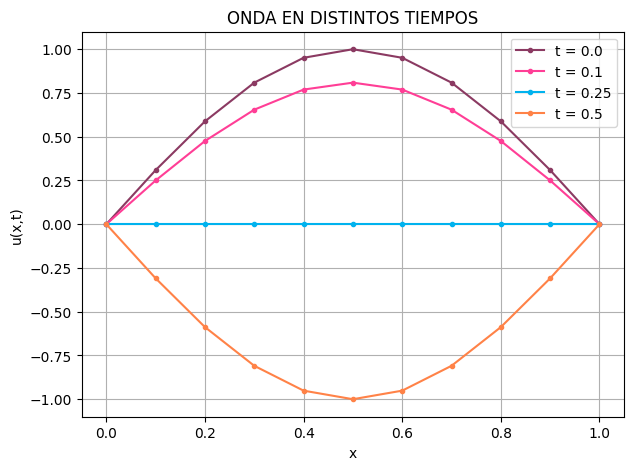

In [34]:
# Gráfica para 2D
plt.figure(figsize=(7,5))

tiempos_plot = [0.0, 0.1, 0.25, 0.5]
colores = ['#8B3A62', '#FF3E96', '#00B2EE', '#FF8247'] # Definimos una lista de colores

for i, tt in enumerate(tiempos_plot):
    n = int(tt / k)
    plt.plot(x, U[n, :], '-o', color=colores[i], markersize=3, label=f"t = {tt}")

plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("ONDA EN DISTINTOS TIEMPOS")
plt.grid(True)
plt.legend()
plt.show()


**EJERCICIO 1. GRÁFICA 3D**

/tmp/ipython-input-2030460150.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  surf = ax.plot_surface(X, T, U_plot_T, cmap=cm.get_cmap('magma'), edgecolor='k')


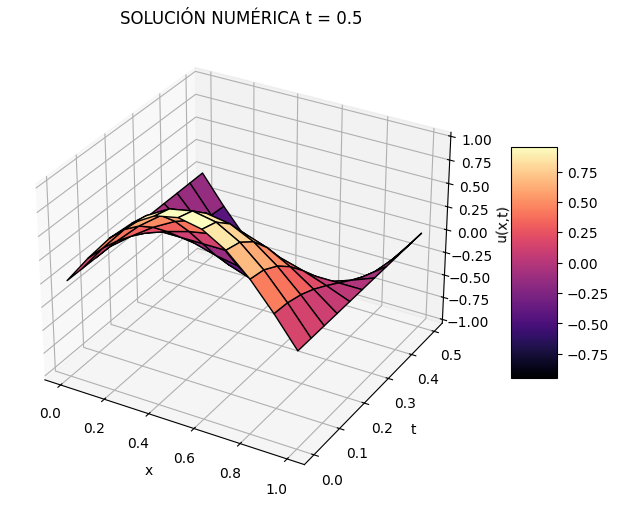

In [35]:
import matplotlib.cm as cm # Asegúrate de importar esto

# construimos la grafica en 3D
mask = t <= 0.5
t_plot = t[mask]
U_plot = U[mask, :]

T, X = np.meshgrid(t_plot, x)
U_plot_T = U_plot.T   # para que coincidan dimensiones

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, T, U_plot_T, cmap=cm.get_cmap('magma'), edgecolor='k')

ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u(x,t)")
ax.set_title("SOLUCIÓN NUMÉRICA t = 0.5")

# Opcional
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

**EJERCICIO 2**

*COMPARACIÓN CON LA TABLA 12.6*

In [19]:
# planteamos la tabla con la que compararemos

x_tabla = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
w_tabla = np.array([
    0.0000000000,
    0.3090169944,
    0.5877852523,
    0.8090169944,
    0.9510565163,
    1.0000000000,
    0.9510565163,
    0.8090169944,
    0.5877852523,
    0.3090169944,
    0.0000000000
])

n20 = 20
t_20 = n20 * k
u_num_t20 = U[n20, :]    # solución numérica para un t (t=1)


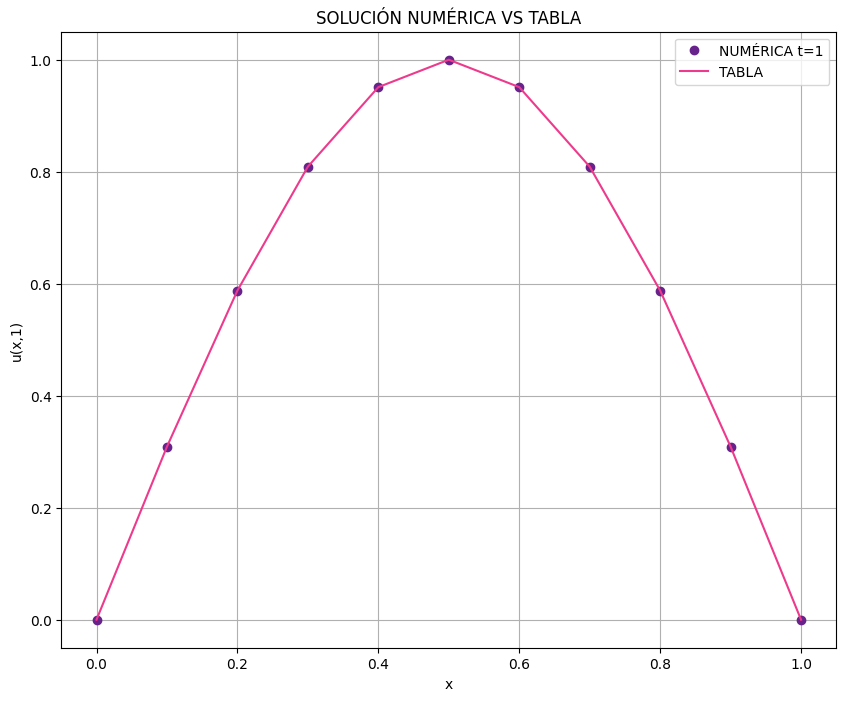

,x,U_num t=1,Tabla 12.6,Error absoluto
0,0.0,0.000000,0.000000,0.000000e+00
1,0.1,0.309017,0.309017,2.505257e-11
2,0.2,0.587785,0.587785,7.526646e-12
3,0.3,0.809017,0.809017,2.505252e-11
4,0.4,0.951057,0.951057,4.846235e-12
5,0.5,1.000000,1.000000,0.000000e+00
6,0.6,0.951057,0.951057,4.846790e-12
7,0.7,0.809017,0.809017,2.505252e-11
8,0.8,0.587785,0.587785,7.527090e-12
9,0.9,0.309017,0.309017,2.505257e-11


Error máximo Tabla 12.6 = 2.5052571128725276e-11


In [24]:
# Gráfica de la solucion numerica
plt.figure(figsize=(10,8))
plt.plot(x, u_num_t20, 'o', color='#68228B' ,label="NUMÉRICA t=1")
plt.plot(x_tabla, w_tabla, color='#EE3A8C' ,label="TABLA")
plt.xlabel("x")
plt.ylabel("u(x,1)")
plt.title("SOLUCIÓN NUMÉRICA VS TABLA")
plt.grid(True)
plt.legend()
plt.show()

# Tabla de comparación y calculo del error
df_tabla = pd.DataFrame({
    "x": x,
    "U_num t=1": u_num_t20,
    "Tabla 12.6": w_tabla
})
df_tabla["Error absoluto"] = np.abs(df_tabla["U_num t=1"] - df_tabla["Tabla 12.6"])

display(df_tabla)
print("Error máximo Tabla 12.6 =", df_tabla["Error absoluto"].max())


**EJERCICIO 3**

*COMPARACIÓN CON LA SOLUCIÓN EXACTA*

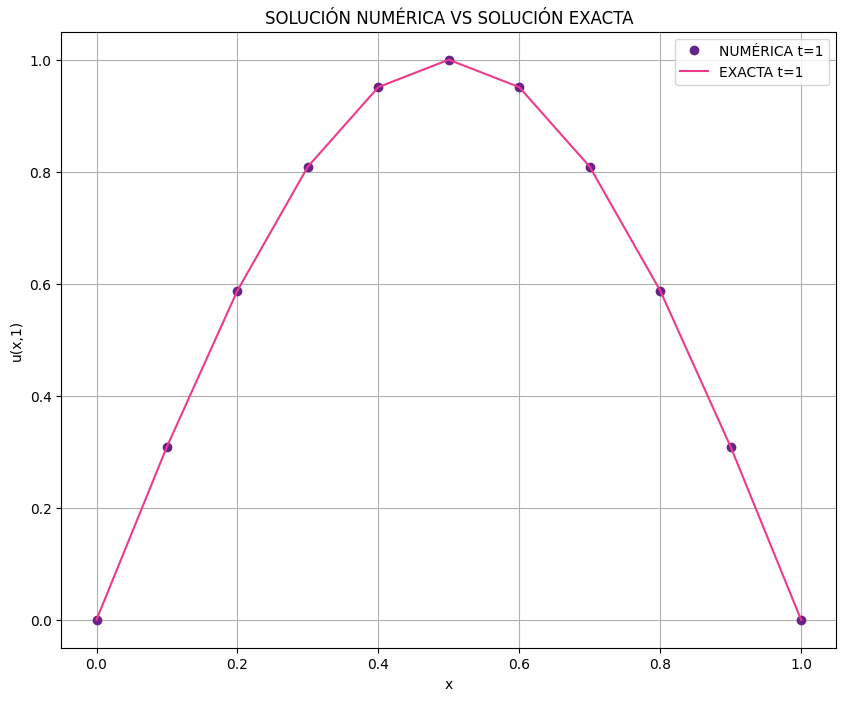

,x,U_num t=1,Exacta t=1,Error absoluto
0,0.0,0.000000,0.000000e+00,0.000000e+00
1,0.1,0.309017,3.090170e-01,5.551115e-17
2,0.2,0.587785,5.877853e-01,2.220446e-16
3,0.3,0.809017,8.090170e-01,0.000000e+00
4,0.4,0.951057,9.510565e-01,2.220446e-16
5,0.5,1.000000,1.000000e+00,0.000000e+00
6,0.6,0.951057,9.510565e-01,3.330669e-16
7,0.7,0.809017,8.090170e-01,0.000000e+00
8,0.8,0.587785,5.877853e-01,3.330669e-16
9,0.9,0.309017,3.090170e-01,5.551115e-17


Error máximo solución exacta = 3.3306690738754696e-16


In [27]:
# GRÁFICA DE LA SOLUCIÓN NUMÉRICA Y EXACTA
u_ex_t20 = u_ex(x, t_20)

# Gráfica numérico vs exacta
plt.figure(figsize=(10,8))
plt.plot(x, u_num_t20, "o", color='#68228B' ,label="NUMÉRICA t=1")
plt.plot(x, u_ex_t20, color='#EE3A8C',label="EXACTA t=1")
plt.xlabel("x")
plt.ylabel("u(x,1)")
plt.title("SOLUCIÓN NUMÉRICA VS SOLUCIÓN EXACTA")
plt.grid(True)
plt.legend()
plt.show()

# Tabla de comparación y errores
df_exacta = pd.DataFrame({
    "x": x,
    "U_num t=1": u_num_t20,
    "Exacta t=1": u_ex_t20
})
df_exacta["Error absoluto"] = np.abs(df_exacta["U_num t=1"] - df_exacta["Exacta t=1"])

display(df_exacta)
print("Error máximo solución exacta =", df_exacta["Error absoluto"].max())


**EJERCICIO 4**

*ANIMACIÓN DE LA GRÁFICA DE LA ECUACIÓN DE ONDA*

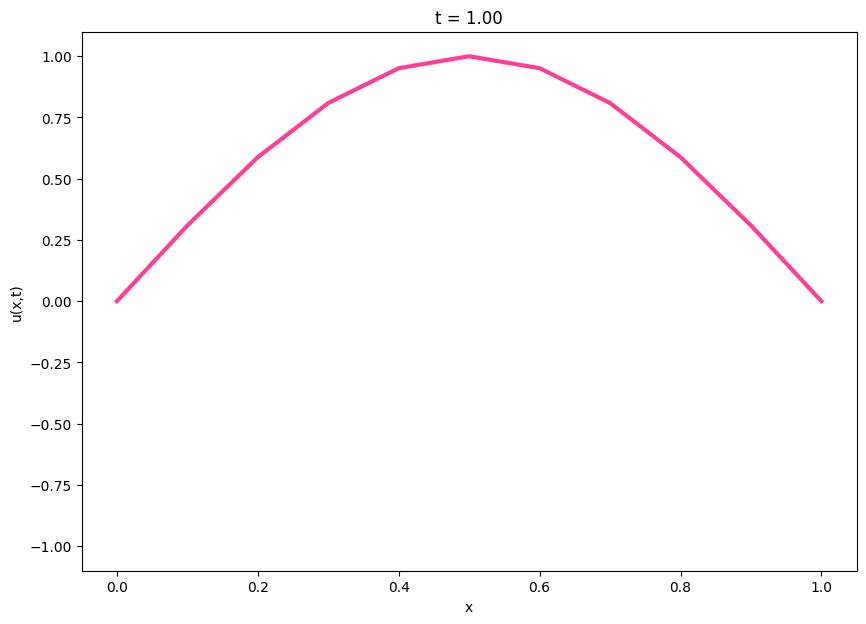

In [33]:
# ANIMACIÓN DE LA ONDA

from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(10,7))

line, = ax.plot(x, U[0, :], lw=3, color='#FF3E96') #COLOR

ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
# Aseguramos el límite Y para que no cambie durante la animación
ax.set_ylim(np.min(U)*1.1, np.max(U)*1.1)
ax.set_title("Evolución temporal")

def update_frame(n):
    line.set_ydata(U[n, :])
    ax.set_title(f"t = {n*k:.2f}")
    return line,

anim = FuncAnimation(fig, update_frame, frames=Nt+1, interval=100, blit=True)

HTML(anim.to_jshtml())
